In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')

#Head of Data
df.head()


,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [4]:
#Info of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

### Checking for Missing Values

In [5]:
df.isnull().sum()

Co_Code                           0
Co_Name                           0
Networth Next Year                0
Equity Paid Up                    0
Networth                          0
                               ... 
Debtors Velocity (Days)           0
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
Length: 67, dtype: int64

In [6]:
df.dropna(inplace= True)

In [7]:
df.shape

(3478, 67)

### Descriptive Statistics

In [8]:
df.describe(include= 'all')

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3478.000000,3478,3478.00000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,...,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3.478000e+03,3478.000000,3478.000000,3478.000000
unique,NaN,3478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Mahaveer Infoway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16035.110121,NaN,695.16477,63.483120,625.787645,2552.795152,1781.765822,599.449034,409.407892,1772.834747,...,-46.802619,-105.536176,-313.524991,-308.709779,-367.443358,617.107821,2.088570e+03,79.632260,0.825127,63.114267
std,19788.596430,NaN,4591.16733,790.545496,3944.010943,24282.048921,21452.740398,4937.520124,6375.614458,20792.208134,...,1807.404600,3094.191672,11085.468405,10836.215161,12687.778624,10799.756889,5.498550e+04,137.879978,1.192036,991.663584
min,4.000000,NaN,-8021.60000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,2997.250000,NaN,3.92250,3.732500,3.850000,7.602500,0.040000,0.610000,1.000000,4.062500,...,0.152500,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.280000
50%,6053.500000,NaN,18.73000,8.190000,18.305000,38.430000,7.710000,15.985000,10.275000,24.615000,...,8.055000,5.230000,4.670000,3.885000,1.585000,49.500000,3.900000e+01,35.000000,0.495000,1.530000
75%,24262.500000,NaN,121.10000,19.232500,114.032500,223.020000,73.087500,132.650000,61.150000,135.277500,...,18.597500,14.087500,13.840000,11.237500,7.187500,106.000000,9.000000e+01,96.000000,1.170000,4.857500


In [9]:
# Adding the target column "default" in the dataset.

df['default'] = df.apply(lambda _: '', axis=1)

In [10]:
# Criteria if Networth_Next_Year is positive assign 0 else assign 1.
df['default'] = df['Networth Next Year'].apply(lambda x: 0 if x > 0 else 1)

In [11]:
df['default'].value_counts()

0    3101
1     377
Name: default, dtype: int64

### Checking proportion of default

In [12]:
df['default'].describe()

count    3478.000000
mean        0.108396
std         0.310924
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default, dtype: float64

## Outlier Treatment

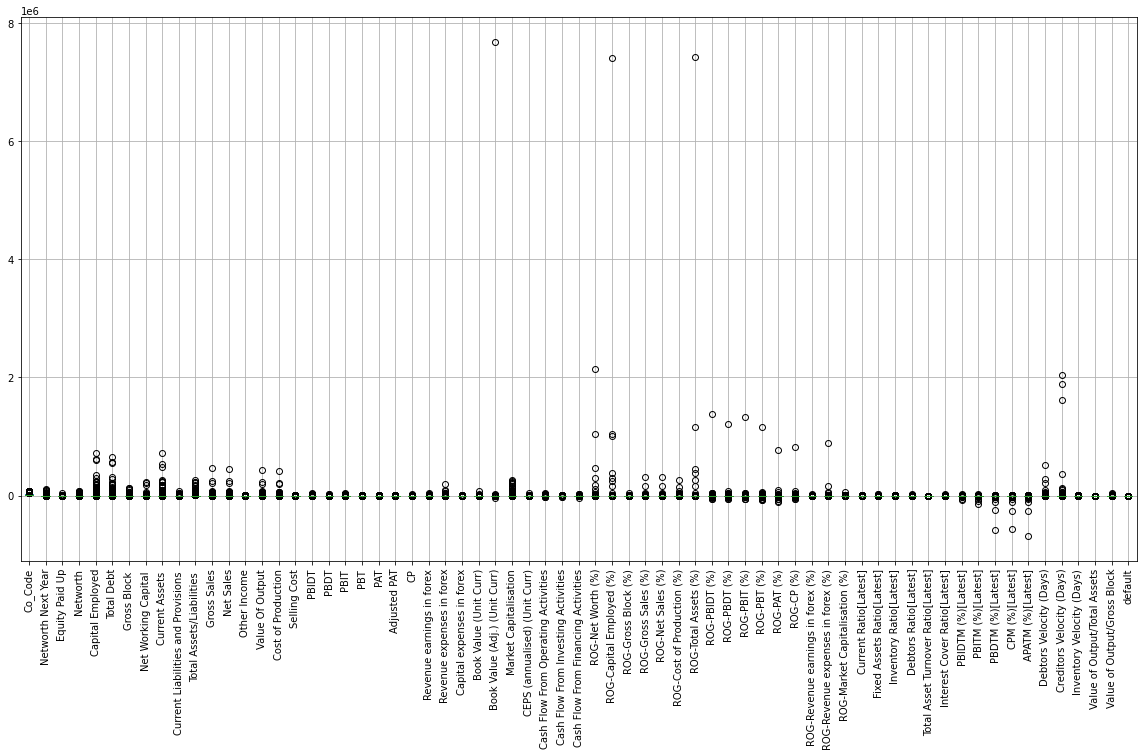

In [13]:
df.boxplot(figsize=(20,10),rot=90);

In [14]:
df.drop('Co_Code',inplace= True, axis = 1)

In [15]:
df.drop('Co_Name',inplace= True, axis = 1)

In [16]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
check_outlier(df['default'])

(0.0, 0.0)

In [18]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [19]:
for i in df:
    df[i]=treat_outlier(df[i])

-17.4815 3.9225 121.10000000000001 1956.1609999999964 <built-in function min> <built-in function max>
0.5 3.7325 19.2325 126.3769999999998 <built-in function min> <built-in function max>
-12.00449999999999 3.85 114.0325 1793.186999999994 <built-in function min> <built-in function max>
0.45 7.602499999999999 223.02 3471.9914999999814 <built-in function min> <built-in function max>
0.0 0.04 73.0875 1531.0069999999955 <built-in function min> <built-in function max>
0.0 0.61 132.65 1410.1334999999985 <built-in function min> <built-in function max>
-11.933 1.0 61.15 829.0055 <built-in function min> <built-in function max>
0.14 4.0625 135.2775 2000.6599999999953 <built-in function min> <built-in function max>
0.02 0.7625000000000001 65.765 1020.5979999999997 <built-in function min> <built-in function max>
1.2385000000000002 10.585 305.7525 4542.066999999995 <built-in function min> <built-in function max>
0.0 1.46 242.7825 2841.730499999998 <built-in function min> <built-in function max>
0.0 

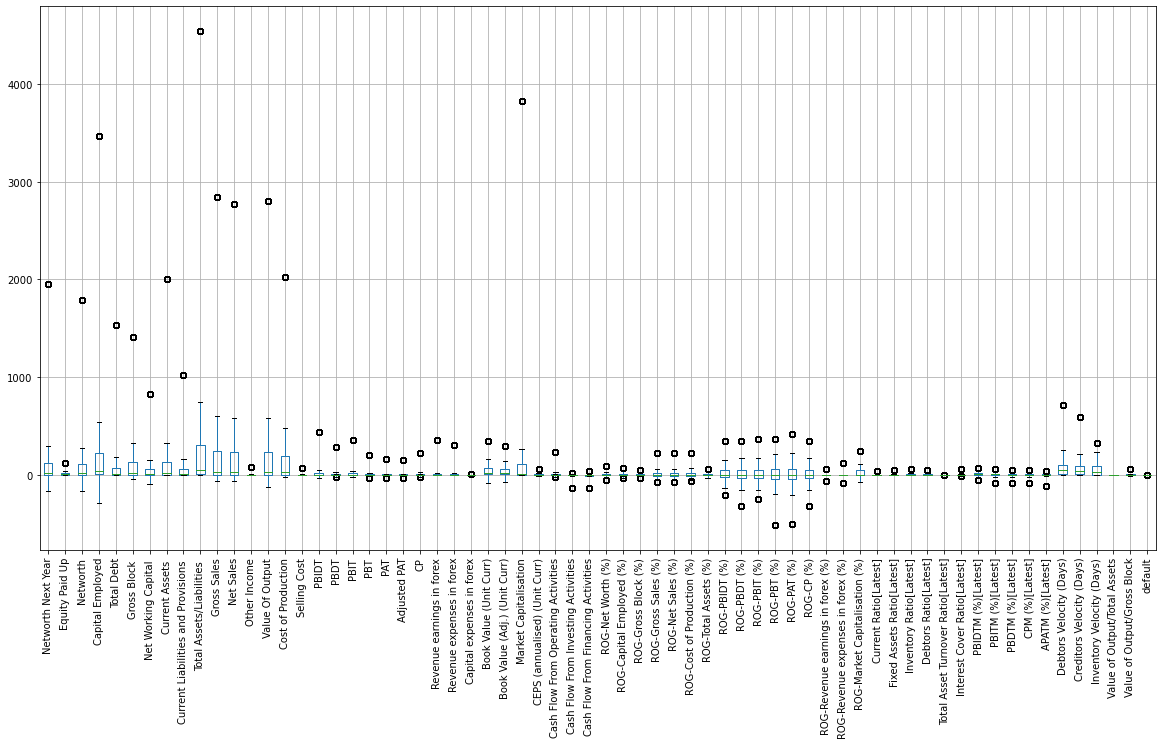

In [20]:
df.boxplot(figsize=(20,10), rot=90);

### Univariate Analysis

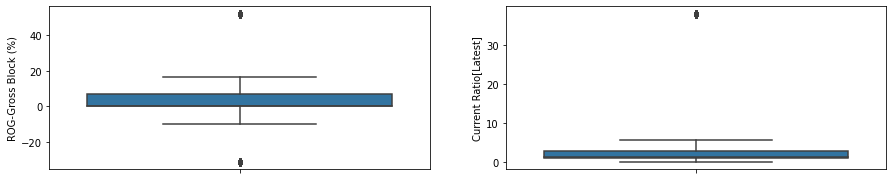

In [21]:
plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
sns.boxplot(y = df['ROG-Gross Block (%)'])

plt.subplot(1,2,2)
sns.boxplot(y = df['Current Ratio[Latest]'])
plt.show()

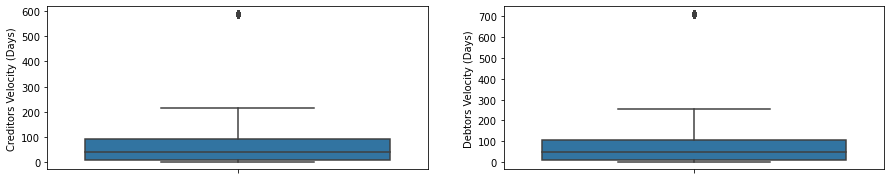

In [22]:
plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
sns.boxplot(y = df['Creditors Velocity (Days)'])

plt.subplot(1,2,2)
sns.boxplot(y = df['Debtors Velocity (Days)'])
plt.show()

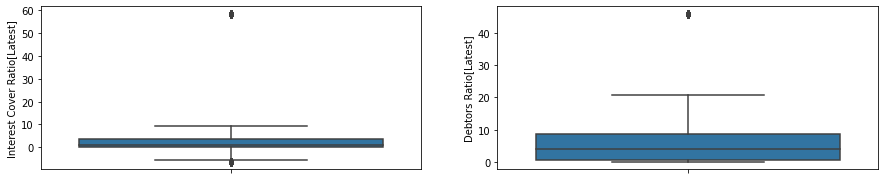

In [23]:
plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
sns.boxplot(y = df['Interest Cover Ratio[Latest]'])

plt.subplot(1,2,2)
sns.boxplot(y = df['Debtors Ratio[Latest]'])
plt.show()

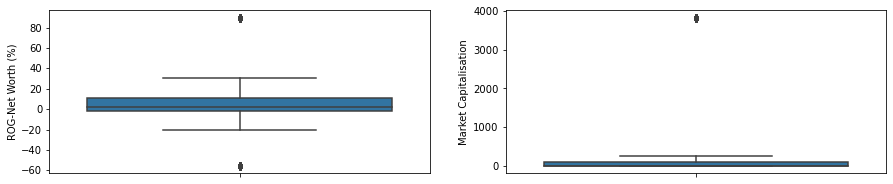

In [24]:
plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
sns.boxplot(y = df['ROG-Net Worth (%)'])

plt.subplot(1,2,2)
sns.boxplot(y = df['Market Capitalisation'])
plt.show()

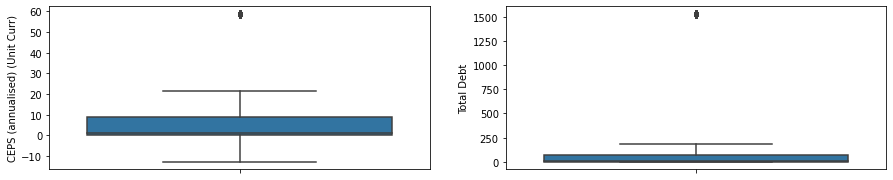

In [25]:
plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
sns.boxplot(y = df['CEPS (annualised) (Unit Curr)'])

plt.subplot(1,2,2)
sns.boxplot(y = df['Total Debt'])
plt.show()

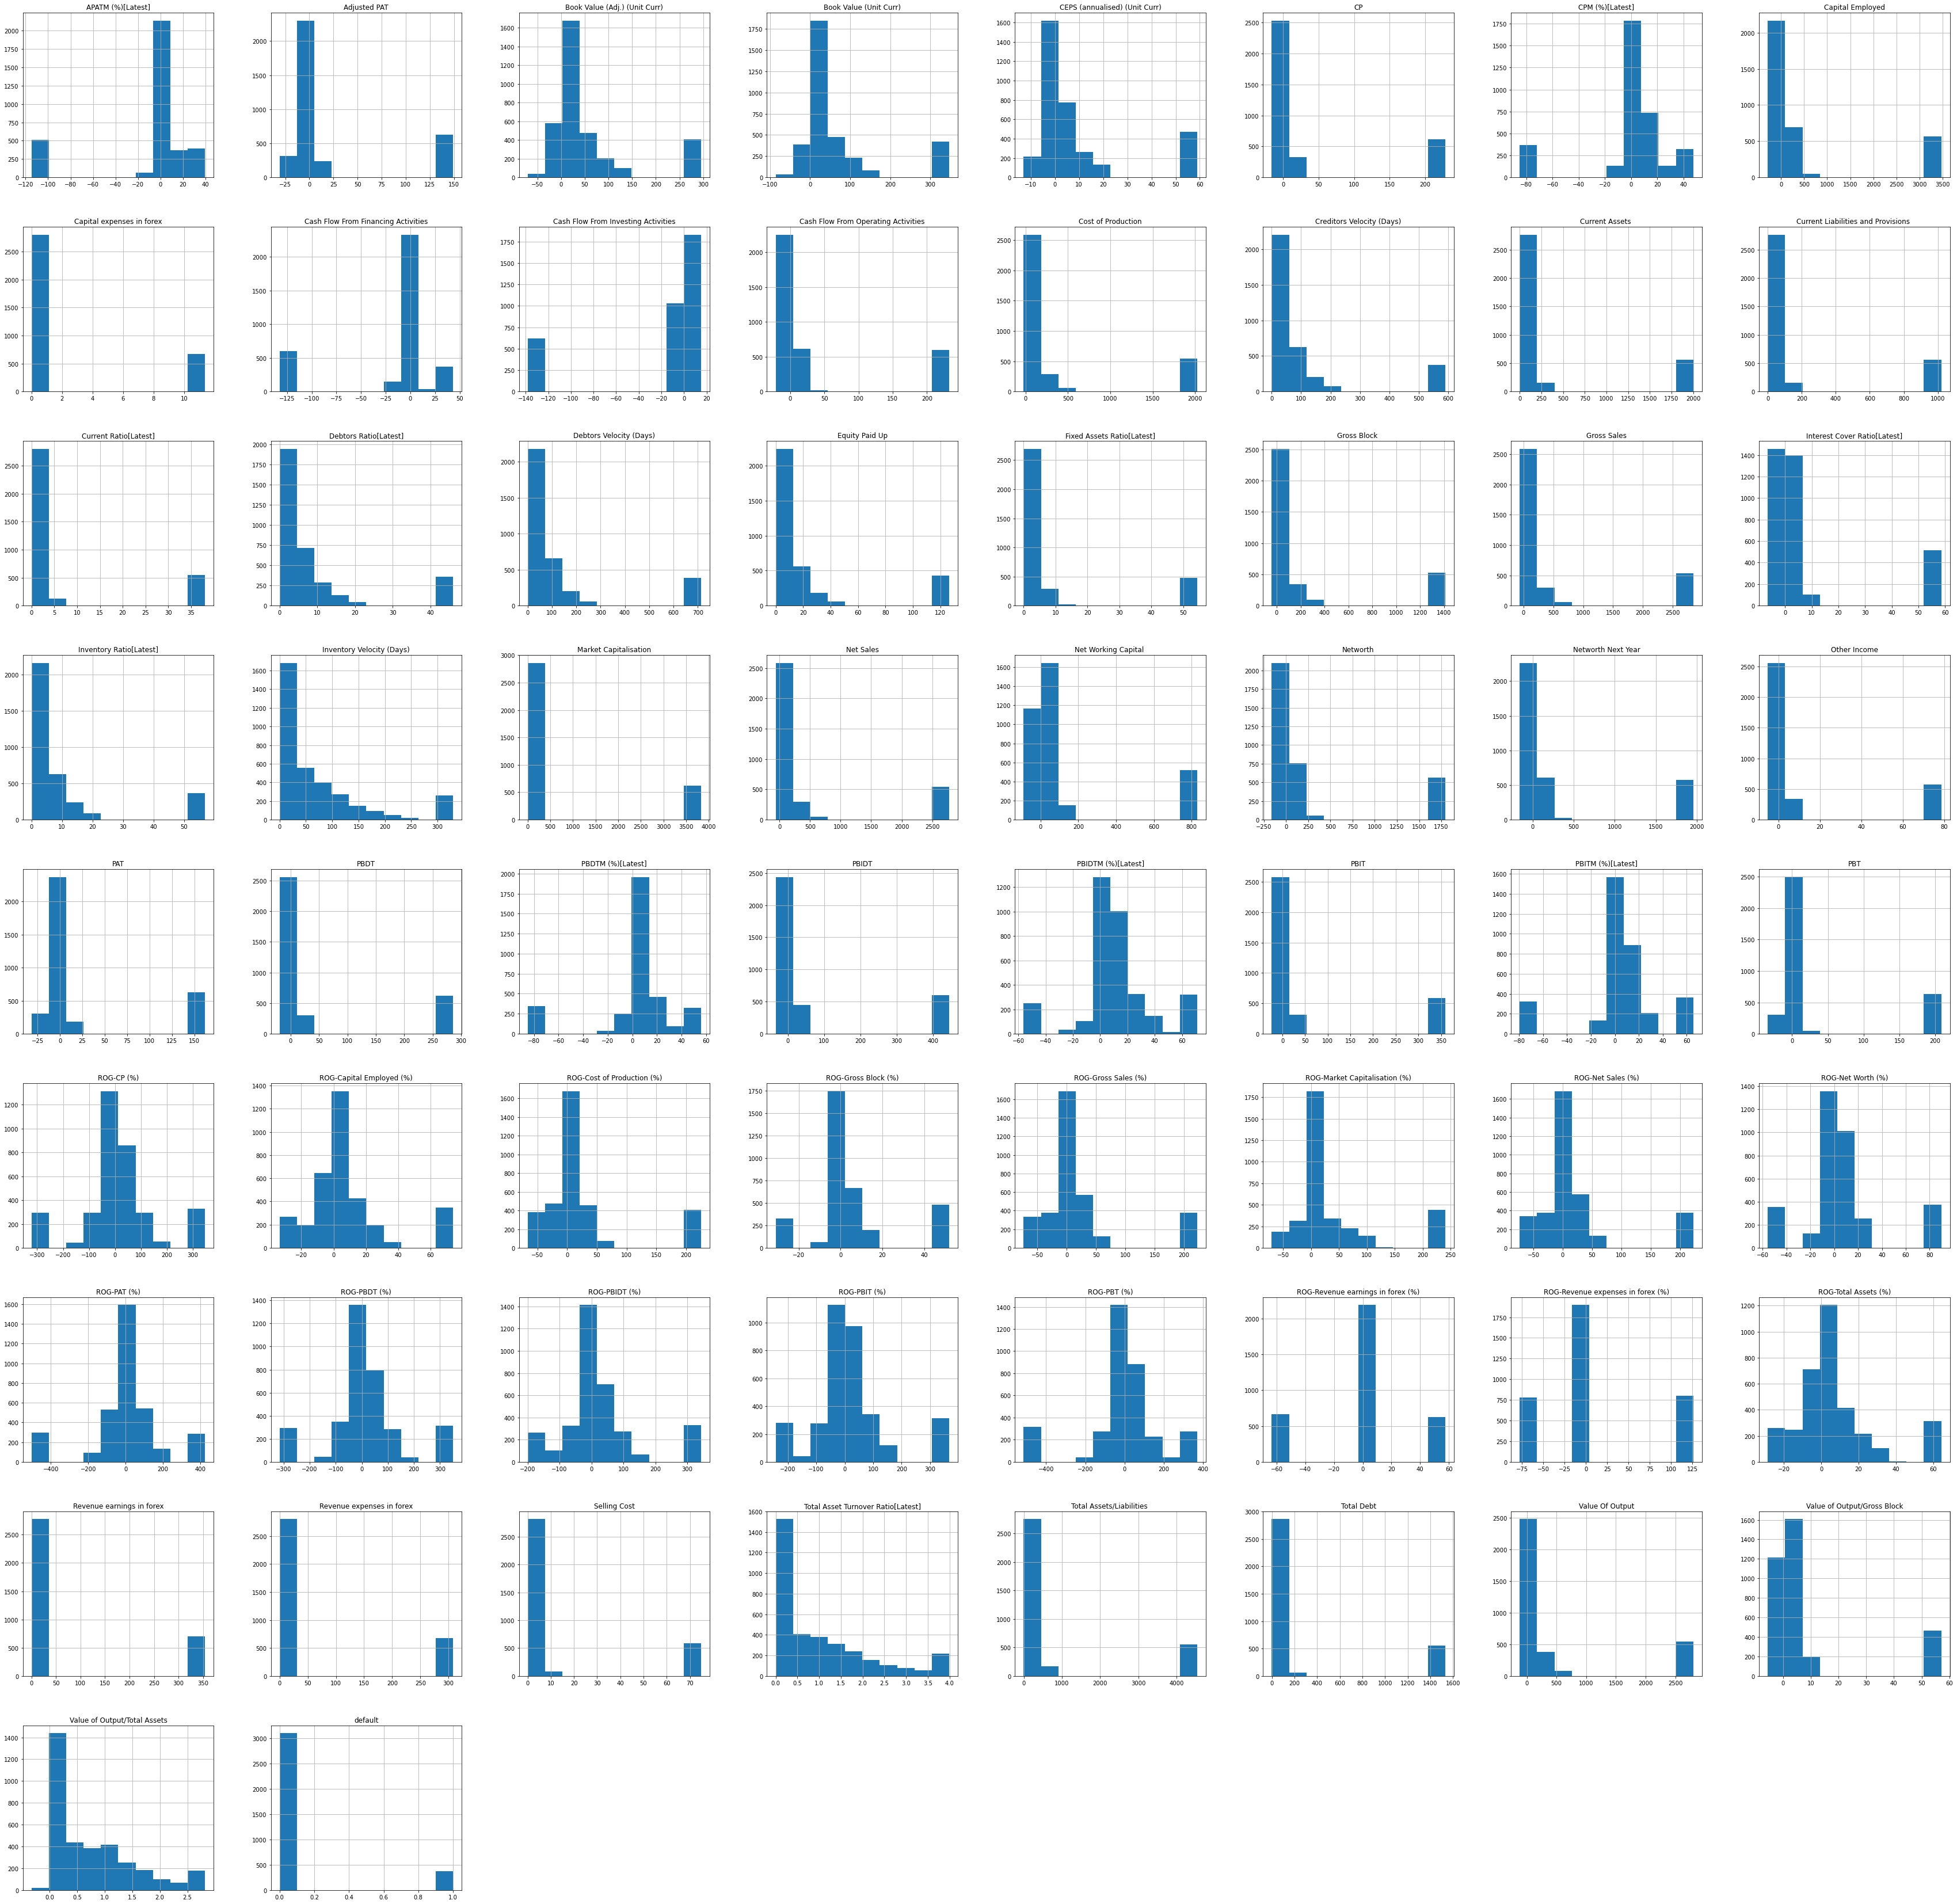

In [26]:
df.hist(figsize=(60,60));

#### Categorical Variables

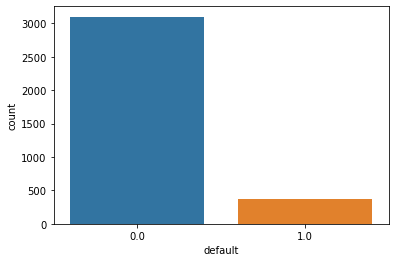

In [27]:
sns.countplot(df['default']);

In [28]:
df['default'].value_counts()

0.0    3101
1.0     377
Name: default, dtype: int64

### Bivariate and Multivariate Analysis

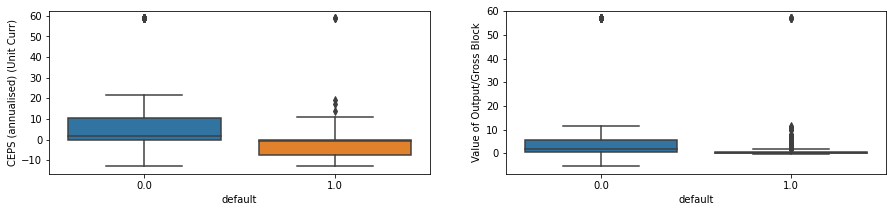

In [29]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['CEPS (annualised) (Unit Curr)'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['Value of Output/Gross Block'])
plt.show()

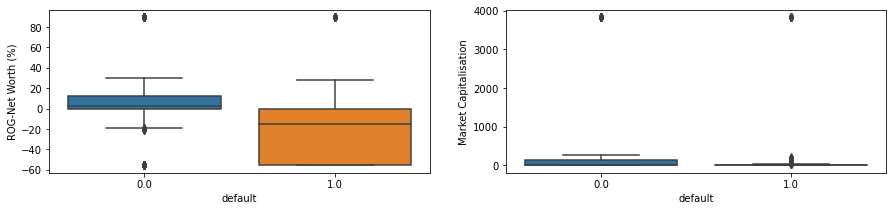

In [30]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['ROG-Net Worth (%)'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['Market Capitalisation'])
plt.show()

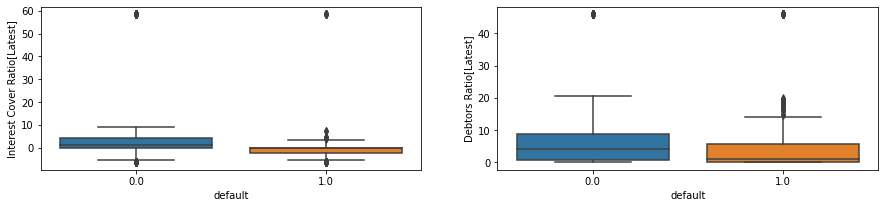

In [31]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['Interest Cover Ratio[Latest]'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['Debtors Ratio[Latest]'])
plt.show()

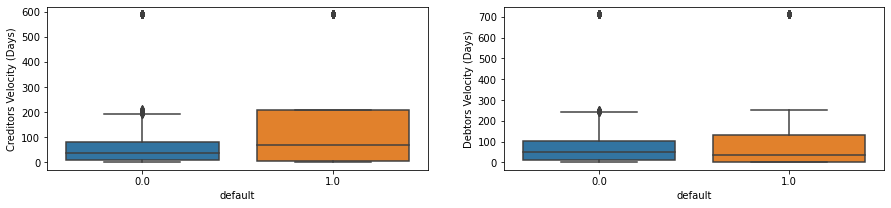

In [32]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['Creditors Velocity (Days)'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['Debtors Velocity (Days)'])
plt.show()

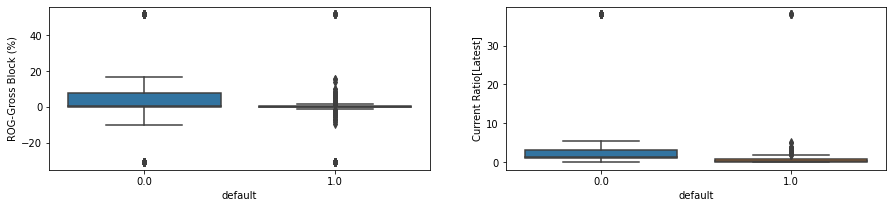

In [33]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['ROG-Gross Block (%)'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['Current Ratio[Latest]'])
plt.show()

In [34]:
# Covariance  Matrix
df.cov()

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
Networth Next Year,514826.882223,16754.113660,447566.328151,7.663831e+05,226057.388814,237773.364914,136097.792355,396040.369161,190791.133262,9.687658e+05,...,3426.979205,2677.761961,2385.661232,3155.621752,-11204.791810,-6842.351001,889.456197,16.966738,-471.534360,-40.717356
Equity Paid Up,16754.113660,1550.223955,14890.842244,3.109880e+04,11512.732214,10405.343125,4983.984962,16271.082536,8633.290534,4.035222e+04,...,2.792027,-53.092690,-48.844521,-109.690381,-7.444522,307.338915,25.998643,-2.198171,-22.922529,0.229363
Networth,447566.328151,14890.842244,424556.799213,7.064157e+05,207450.191024,217851.503625,125417.223818,363525.615623,175447.263134,8.924596e+05,...,2577.979925,1872.179416,1654.558744,2208.523284,-8985.834834,-5325.815752,1253.848098,8.370848,-486.447492,-34.222838
Capital Employed,766383.149055,31098.802684,706415.672422,1.594615e+06,517830.885193,470557.245165,266936.890757,788081.808953,373483.797035,1.973179e+06,...,3025.325442,470.396252,265.075886,-2.317234,-7351.807822,-4685.311823,5995.383730,1.731985,-1137.611194,-36.798496
Total Debt,226057.388814,11512.732214,207450.191024,5.178309e+05,308948.013843,193235.274256,101734.978574,291087.558374,142803.235299,6.737341e+05,...,-241.758984,-1745.453593,-1623.108601,-2773.321747,759.983969,2260.695336,4611.313183,0.167598,-726.915751,8.272039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Creditors Velocity (Days),-6842.351001,307.338915,-5325.815752,-4.685312e+03,2260.695336,-4381.731929,-913.036286,-1174.577501,2582.855641,-1.346932e+03,...,-712.166829,-936.546339,-853.655015,-1101.691385,13423.781451,30533.685123,398.492925,-26.789925,-172.657239,8.903779
Inventory Velocity (Days),889.456197,25.998643,1253.848098,5.995384e+03,4611.313183,3305.758006,3290.172766,5000.904992,2280.344486,7.017627e+03,...,-286.276381,-289.783543,-280.780398,-440.571788,1043.681362,398.492925,8408.982203,-1.394366,-134.572445,-0.021479
Value of Output/Total Assets,16.966738,-2.198171,8.370848,1.731985e+00,0.167598,30.829897,12.351298,33.326518,17.216506,1.971965e+01,...,1.391355,2.878182,3.166982,6.649076,-36.467124,-26.789925,-1.394366,0.559675,3.379610,-0.031821
Value of Output/Gross Block,-471.534360,-22.922529,-486.447492,-1.137611e+03,-726.915751,-1549.143656,-190.803490,-534.508009,-412.721283,-1.320457e+03,...,89.593799,58.012647,54.547477,123.230628,-203.489144,-172.657239,-134.572445,3.379610,355.645580,-0.774906


In [35]:
# Correlation Matrix
df.corr()

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
Networth Next Year,1.000000,0.593053,0.957324,0.845838,0.566820,0.670677,0.654002,0.766214,0.718158,0.827151,...,0.143228,0.111740,0.102907,0.097704,-0.073249,-0.054574,0.013518,0.031608,-0.034848,-0.182513
Equity Paid Up,0.593053,1.000000,0.580436,0.625487,0.526064,0.534860,0.436454,0.573668,0.592204,0.627866,...,0.002127,-0.040374,-0.038396,-0.061892,-0.000887,0.044672,0.007201,-0.074627,-0.030871,0.018736
Networth,0.957324,0.580436,1.000000,0.858548,0.572800,0.676664,0.663663,0.774477,0.727229,0.839107,...,0.118647,0.086029,0.078592,0.075300,-0.064687,-0.046777,0.020985,0.017173,-0.039588,-0.168925
Capital Employed,0.845838,0.625487,0.858548,1.000000,0.737764,0.754163,0.728852,0.866333,0.798797,0.957272,...,0.071844,0.011153,0.006497,-0.000041,-0.027308,-0.021233,0.051775,0.001833,-0.047770,-0.093723
Total Debt,0.566820,0.526064,0.572800,0.737764,1.000000,0.703598,0.631083,0.726980,0.693885,0.742578,...,-0.013043,-0.094023,-0.090380,-0.110845,0.006413,0.023276,0.090471,0.000403,-0.069348,0.047865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Creditors Velocity (Days),-0.054574,0.044672,-0.046777,-0.021233,0.023276,-0.050750,-0.018016,-0.009331,0.039921,-0.004722,...,-0.122219,-0.160475,-0.151202,-0.140065,0.360339,1.000000,0.024869,-0.204934,-0.052395,0.163882
Inventory Velocity (Days),0.013518,0.007201,0.020985,0.051775,0.090471,0.072959,0.123710,0.075704,0.067162,0.046883,...,-0.093618,-0.094617,-0.094768,-0.106734,0.053385,0.024869,1.000000,-0.020325,-0.077817,-0.000753
Value of Output/Total Assets,0.031608,-0.074627,0.017173,0.001833,0.000403,0.083404,0.056925,0.061839,0.062154,0.016148,...,0.055772,0.115191,0.131022,0.197448,-0.228644,-0.204934,-0.020325,1.000000,0.239547,-0.136803
Value of Output/Gross Block,-0.034848,-0.030871,-0.039588,-0.047770,-0.069348,-0.166251,-0.034885,-0.039345,-0.059107,-0.042896,...,0.142467,0.092105,0.089522,0.145168,-0.050613,-0.052395,-0.077817,0.239547,1.000000,-0.132156


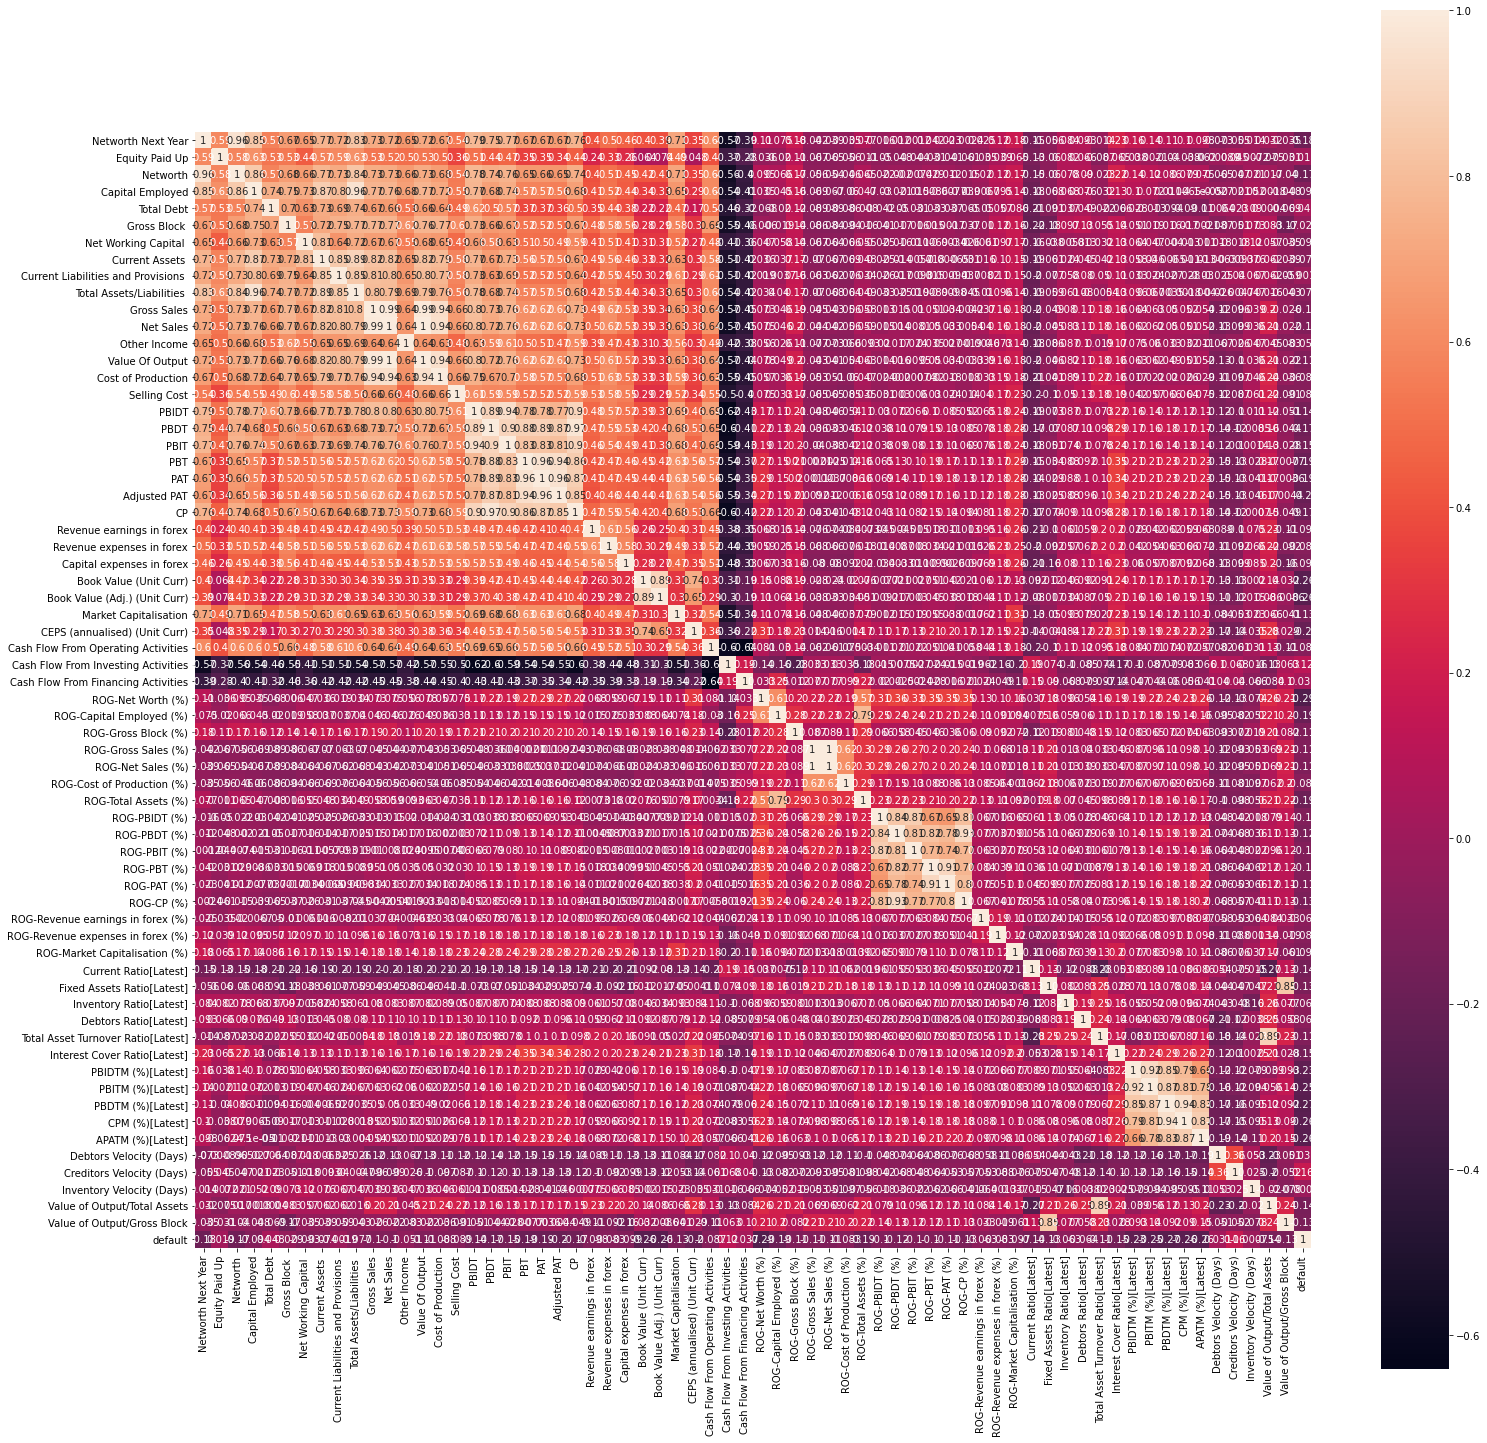

In [36]:
# Heatmap
plt.figure(figsize=(25,25))  
p=sns.heatmap(df.corr(), annot=True,square=True)

### Renaming columns for ease of use

In [37]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(']', '').str.replace('[', '_').str.replace('-', '_').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [38]:
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block,default
0,-17.4815,126.377,-12.0045,0.4500,1531.007,1410.1335,-11.9330,40.50,1020.598,109.600,...,0.000,0.000,0.000,0.0000,0.00,0.00,45.0,0.00,0.00,1.0
1,-17.4815,126.377,-12.0045,3471.9915,1531.007,1410.1335,-11.9330,2000.66,1020.598,4542.067,...,-79.468,-85.106,-85.106,-114.6470,29.00,101.00,2.0,0.31,0.24,1.0
2,-17.4815,126.377,1793.1870,3471.9915,1531.007,1410.1335,829.0055,2000.66,1020.598,4542.067,...,-79.468,-85.106,-85.106,-114.6470,97.00,590.15,0.0,-0.03,-0.26,1.0
3,-17.4815,126.377,-12.0045,3471.9915,1531.007,1410.1335,-11.9330,2000.66,1020.598,4542.067,...,-7.210,-85.106,-85.106,-114.6470,93.00,63.00,2.0,0.24,1.90,1.0
4,-17.4815,126.377,-12.0045,3471.9915,1531.007,1410.1335,829.0055,2000.66,1020.598,4542.067,...,-79.468,-85.106,47.540,39.4615,713.45,590.15,0.0,0.01,0.05,1.0


### Model 1

### Model Building using Logistic Regression for 'Probability at default'

### The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is


# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

In [39]:
import statsmodels.formula.api as sm

**Splitting arrays or matrices into random train and test subsets in ratio 67:33 and random_state=42. Model will be fitted on train set and predictions will be made on the test set**


In [40]:
X = df.drop(['default','Networth_Next_Year'], axis=1)
y = df['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=df['default'])

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

df_train.to_csv('df_train.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [41]:
df.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT

### Checking for Multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [43]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
45,ROG_Revenue_earnings_in_forex_perc,1.130751
46,ROG_Revenue_expenses_in_forex_perc,1.183282
34,ROG_Gross_Block_perc,1.342572
48,Current_Ratio_Latest,1.369118
47,ROG_Market_Capitalisation_perc,1.515056
...,...,...
9,Gross_Sales,65.182264
36,ROG_Net_Sales_perc,86.876665
35,ROG_Gross_Sales_perc,87.317640
12,Value_Of_Output,122.919175


In [44]:
pd.set_option('display.max_rows', None) # for displaying all the rows in the output.

In [45]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
45,ROG_Revenue_earnings_in_forex_perc,1.130751
46,ROG_Revenue_expenses_in_forex_perc,1.183282
34,ROG_Gross_Block_perc,1.342572
48,Current_Ratio_Latest,1.369118
47,ROG_Market_Capitalisation_perc,1.515056
50,Inventory_Ratio_Latest,1.551280
60,Creditors_Velocity_Days,1.560726
61,Inventory_Velocity_Days,1.635801
59,Debtors_Velocity_Days,1.638976
53,Interest_Cover_Ratio_Latest,1.667796


Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model

In [46]:
f1 = 'default ~ ROG_Revenue_earnings_in_forex_perc + ROG_Revenue_expenses_in_forex_perc + ROG_Gross_Block_perc + Current_Ratio_Latest + ROG_Market_Capitalisation_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Interest_Cover_Ratio_Latest + Inventory_Velocity_Days + Debtors_Ratio_Latest + ROG_Cost_of_Production_perc + ROG_Net_Worth_perc + Revenue_earnings_in_forex + Equity_Paid_Up + Capital_expenses_in_forex + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Investing_Activities + Selling_Cost + Other_Income + Revenue_expenses_in_forex + Market_Capitalisation + ROG_Total_Assets_perc + ROG_Capital_Employed_perc + CEPS_annualised_Unit_Curr + Total_Debt + Cash_Flow_From_Operating_Activities + Net_Working_Capital + Value_of_Output_by_Gross_Block + Fixed_Assets_Ratio_Latest'


In [47]:
model_1 = sm.logit(formula = f1, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.229484
         Iterations 10


In [48]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3478
Model:                          Logit   Df Residuals:                     3447
Method:                           MLE   Df Model:                           30
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.3312
Time:                        18:01:31   Log-Likelihood:                -798.15
converged:                       True   LL-Null:                       -1193.5
Covariance Type:            nonrobust   LLR p-value:                5.574e-147
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.1367      0.124     -9.201      0.000      -1.379      -0.895
ROG_Revenue_earnings_in_forex_perc     -0.0006      0.002     -0.278      0.781      -0.005       0.003
ROG_Revenue_expenses_in_forex_perc     -0.0019      0.001     -1.649      0.099      -0.004       0.000
ROG_Gross_Block_perc                   -0.0099      0.004     -2.401      0.016      -0.018      -0.002
Current_Ratio_Latest                   -0.0691      0.011     -6.577      0.000      -0.090      -0.048
ROG_Market_Capitalisation_perc         -0.0009      0.001     -0.868      0.385      -0.003       0.001
Creditors_Velocity_Days                 0.0013      0.000      4.297      0.000       0.001       0.002
Inventory_Ratio_Latest                 -0.0078      0.005     -1.643      0.100      -0.017       0.002
Debtors_Velocity_Days                  -0.0013      0.000     -4.211      0.000      -0.002      -0.001
Interest_Cover_Ratio_Latest            -0.0208      0.007     -2.955      0.003      -0.035      -0.007
Inventory_Velocity_Days                -0.0014      0.001     -1.917      0.055      -0.003    3.11e-05
Debtors_Ratio_Latest                   -0.0137      0.006     -2.289      0.022      -0.025      -0.002
ROG_Cost_of_Production_perc            -0.0012      0.001     -1.297      0.195      -0.003       0.001
ROG_Net_Worth_perc                     -0.0152      0.003     -5.093      0.000      -0.021      -0.009
Revenue_earnings_in_forex              -0.0010      0.001     -1.302      0.193      -0.003       0.001
Equity_Paid_Up                          0.0037      0.002      1.636      0.102      -0.001       0.008
Capital_expenses_in_forex              -0.0278      0.024     -1.139      0.255      -0.075       0.020
Cash_Flow_From_Financing_Activities     0.0011      0.002      0.540      0.589      -0.003       0.005
Cash_Flow_From_Investing_Activities     0.0036      0.002      1.436      0.151      -0.001       0.008
Selling_Cost                            0.0008      0.005      0.180      0.857      -0.008       0.010
Other_Income                            0.0003      0.004      0.090      0.928      -0.007       0.008
Revenue_expenses_in_forex               0.0009      0.001      0.933      0.351      -0.001       0.003
Market_Capitalisation                  -0.0005      0.000     -4.299      0.000      -0.001      -0.000
ROG_Total_Assets_perc                  -0.0068      0.005     -1.308      0.191      -0.017       0.003
ROG_Capital_Employed_perc               0.0010      0.004      0.240      0.811      -0.007       0.010
CEPS_annualised_Unit_Curr              -0.0850      0.017     -4.881      0.000      -0.119      -0.051
Total_Debt                              0.0011      0.000      5.467      0.000       0.001       0.002
Cash_Flow_From_Operating_Activities    -0.0009      0.002     -0.530      0.596      -0.004       0.002
Net_Working_Capit

We can see that few variables are insignificant & may not be useful to discriminate cases of deault

Let us look at the adjusted pseudo R-square value

In [49]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))


The adjusted pseudo R-square value is 0.30610154693161407


Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 & rebuild our model

### Model 2

In [50]:
f2 = 'default ~ ROG_Gross_Block_perc + Current_Ratio_Latest + Creditors_Velocity_Days + Debtors_Velocity_Days + Interest_Cover_Ratio_Latest + Debtors_Ratio_Latest + ROG_Net_Worth_perc + Market_Capitalisation + CEPS_annualised_Unit_Curr + Total_Debt + Net_Working_Capital + Value_of_Output_by_Gross_Block'


In [51]:
model_2 = sm.logit(formula = f2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.222815
         Iterations 9


In [52]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2317
Method:                           MLE   Df Model:                           12
Date:                Sun, 24 Oct 2021   Pseudo R-squ.:                  0.3514
Time:                        18:02:02   Log-Likelihood:                -519.16
converged:                       True   LL-Null:                       -800.46
Covariance Type:            nonrobust   LLR p-value:                1.019e-112
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.3717      0.136    -10.079      0.000      -1.638      -1.105
ROG_Gross_Block_perc              -0.0127      0.005     -2.547      0.011      -0.022      -0.003
Current_Ratio_Latest              -0.0799      0.016     -4.913      0.000      -0.112      -0.048
Creditors_Velocity_Days            0.0016      0.000      4.002      0.000       0.001       0.002
Debtors_Velocity_Days             -0.0009      0.000     -2.475      0.013      -0.002      -0.000
Interest_Cover_Ratio_Latest       -0.0320      0.011     -2.984      0.003      -0.053      -0.011
Debtors_Ratio_Latest              -0.0217      0.008     -2.857      0.004      -0.037      -0.007
ROG_Net_Worth_perc                -0.0170      0.003     -5.063      0.000      -0.024      -0.010
Market_Capitalisation             -0.0005      0.000     -3.998      0.000      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.1133      0.022     -5.182      0.000      -0.156      -0.070
Total_Debt                         0.0012      0.000      5.252      0.000       0.001       0.002
Net_Working_Capital               -0.0030      0.001     -5.495      0.000      -0.004      -0.002
Value_of_Output_by_Gross_Block    -0.0232      0.007     -3.107      0.002      -0.038      -0.009
==================================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We can see that all variables are significant & may be useful to discriminate cases of default.

Let us also check the multicollinearity of the model using Variance Inflation Factor (VIF) for the predictor variables

In [53]:
calc_vif(X_train[['ROG_Gross_Block_perc','Current_Ratio_Latest' , 'Creditors_Velocity_Days' , 'Debtors_Velocity_Days' , 'Interest_Cover_Ratio_Latest' , 'Debtors_Ratio_Latest' , 'ROG_Net_Worth_perc' , 'Market_Capitalisation' , 'CEPS_annualised_Unit_Curr' , 'Total_Debt' , 'Net_Working_Capital' , 'Value_of_Output_by_Gross_Block']]).sort_values(by='VIF', ascending = True)

,variables,VIF
0,ROG_Gross_Block_perc,1.169302
1,Current_Ratio_Latest,1.195266
6,ROG_Net_Worth_perc,1.243588
11,Value_of_Output_by_Gross_Block,1.287246
5,Debtors_Ratio_Latest,1.303417
4,Interest_Cover_Ratio_Latest,1.438404
2,Creditors_Velocity_Days,1.441400
3,Debtors_Velocity_Days,1.482654
8,CEPS_annualised_Unit_Curr,1.625185
7,Market_Capitalisation,1.947910


In [54]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.33643092679053255


We see that adjusted R sq is now close to Rsq, thus suggesting lesser insignificant variables in the model

We also notice that current model has no insignificant variables and can be used for prediction purposes.

Lets test the prediction of this model on train and test dataset

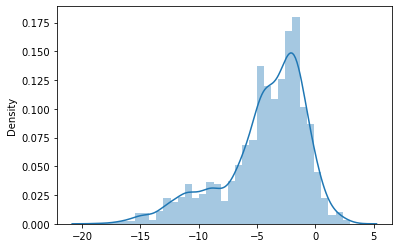

In [55]:
sns.distplot(model_2.fittedvalues);

### Prediction on Train Data

In [56]:
y_predict_train = model_2.predict(X_train)
y_predict_train

2976    2.630587e-01
1398    4.040741e-03
1517    4.053269e-02
3144    4.540771e-08
1440    3.508468e-01
1551    1.117812e-01
1255    3.923802e-01
1352    1.728850e-03
1078    2.351376e-01
2898    2.425502e-02
3042    6.702287e-05
1301    1.703295e-02
859     2.046311e-01
2785    4.450349e-06
3550    2.895282e-02
2809    7.355679e-02
1909    3.100273e-05
1069    1.022269e-01
1486    1.416645e-01
311     1.981790e-01
2101    1.032855e-01
269     1.093740e-01
2957    1.361292e-04
3455    4.820493e-02
1296    1.275814e-01
2980    1.601206e-03
2279    2.398040e-02
3097    1.170691e-01
533     3.200190e-03
1456    2.850694e-02
450     2.009273e-01
3436    2.911383e-01
994     2.729878e-03
1631    3.231397e-02
2130    2.920330e-02
3121    5.288575e-04
1874    2.874427e-01
2407    7.229384e-03
569     3.073706e-01
2001    1.260052e-02
2322    1.757784e-01
2136    6.779489e-02
3336    1.392912e-02
2304    4.371911e-05
2111    2.625051e-01
774     1.438831e-02
1402    3.063186e-02
3026    1.254

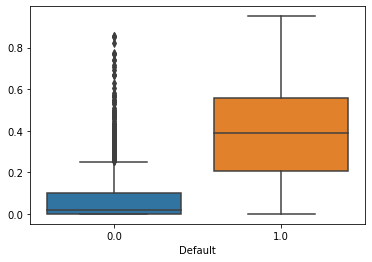

In [57]:
sns.boxplot(x=df['default'],y=y_predict_train)
plt.xlabel('Default');

Let us take a cut-off of **0.15** and check.

In [58]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.15:
        a=1
    else:
        a=0
    y_class_pred.append(a)


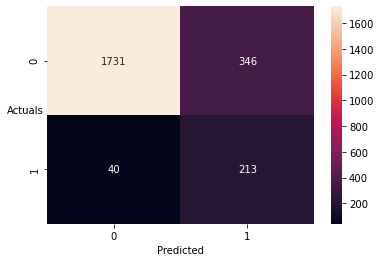

In [59]:
# confusion matrix of training set

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [60]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.977     0.833     0.900      2077
         1.0      0.381     0.842     0.525       253

    accuracy                          0.834      2330
   macro avg      0.679     0.838     0.712      2330
weighted avg      0.913     0.834     0.859      2330



* As observed above, accuracy of the model i.e. %overall correct predictions is 83%
* Sensitivity of the model is 83% i.e. 83% of those defaulted were correctly identified as defaulters by the model

### Prediction on Test Data

In [61]:
y_predict_test = model_2.predict(X_test)
y_predict_test

436     3.579071e-02
157     3.136426e-01
2569    4.522658e-01
2749    5.963580e-02
363     4.372409e-01
468     1.344182e-01
1587    7.262060e-02
2242    3.898989e-01
1769    2.087676e-01
72      2.003968e-01
1997    4.413915e-02
998     7.569134e-02
2056    2.503300e-03
3258    6.622281e-03
2356    8.330508e-05
2268    4.849231e-04
913     7.602715e-03
1745    7.427457e-02
2834    2.623368e-02
1831    8.013558e-02
187     6.591739e-01
28      4.605086e-02
1018    1.859629e-02
3255    7.788302e-06
2122    4.279303e-04
1946    1.319470e-01
3456    1.290649e-03
2627    8.365035e-02
966     2.268224e-01
2430    1.746354e-01
2183    3.359353e-01
1687    4.521895e-03
2925    4.295608e-02
2608    9.618622e-03
2287    3.807460e-02
1617    2.676667e-01
485     1.152240e-01
864     7.814358e-03
3076    7.028696e-05
1904    5.909158e-02
1052    1.343603e-01
2238    9.490244e-06
3307    2.190355e-03
1039    1.486863e-01
1       3.797639e-01
1677    1.255905e-01
3380    7.108016e-03
1044    2.488

In [62]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.16:
        a=1
    else:
        a=0
    y_class_pred.append(a)

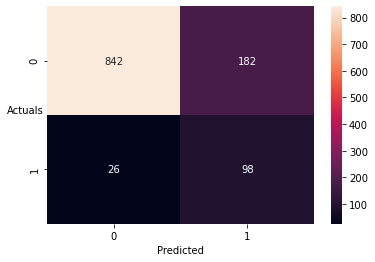

In [63]:
# Confusion matrix of test data

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [64]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 842 
False Positives: 182 
False Negatives: 26 
True Positives: 98


In [65]:
#classification report

print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.970     0.822     0.890      1024
         1.0      0.350     0.790     0.485       124

    accuracy                          0.819      1148
   macro avg      0.660     0.806     0.688      1148
weighted avg      0.903     0.819     0.846      1148



* As observed above, accuracy of the model i.e. %overall correct predictions is 81%.
* Sensitivity of the model is 79% i.e. 79% of those defaulted were correctly identified as defaulters by the model.

### Let us take a cut-off of 0.17 and check if our predictions have improved

In [66]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

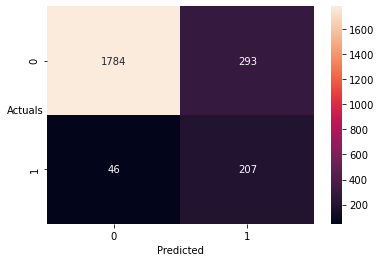

In [67]:
# confusion matrix on train data
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [68]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1784 
False Positives: 293 
False Negatives: 46 
True Positives: 207


In [69]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.975     0.859     0.913      2077
         1.0      0.414     0.818     0.550       253

    accuracy                          0.855      2330
   macro avg      0.694     0.839     0.732      2330
weighted avg      0.914     0.855     0.874      2330



Accuracy of the model i.e. %overall correct predictions has increased from 83% to 85% but sensitivity of the model has dropped slightly from 84% to 82%.

In [70]:
#Prediction on Test set

y_predict_test = model_2.predict(X_test)
y_predict_test

436     3.579071e-02
157     3.136426e-01
2569    4.522658e-01
2749    5.963580e-02
363     4.372409e-01
468     1.344182e-01
1587    7.262060e-02
2242    3.898989e-01
1769    2.087676e-01
72      2.003968e-01
1997    4.413915e-02
998     7.569134e-02
2056    2.503300e-03
3258    6.622281e-03
2356    8.330508e-05
2268    4.849231e-04
913     7.602715e-03
1745    7.427457e-02
2834    2.623368e-02
1831    8.013558e-02
187     6.591739e-01
28      4.605086e-02
1018    1.859629e-02
3255    7.788302e-06
2122    4.279303e-04
1946    1.319470e-01
3456    1.290649e-03
2627    8.365035e-02
966     2.268224e-01
2430    1.746354e-01
2183    3.359353e-01
1687    4.521895e-03
2925    4.295608e-02
2608    9.618622e-03
2287    3.807460e-02
1617    2.676667e-01
485     1.152240e-01
864     7.814358e-03
3076    7.028696e-05
1904    5.909158e-02
1052    1.343603e-01
2238    9.490244e-06
3307    2.190355e-03
1039    1.486863e-01
1       3.797639e-01
1677    1.255905e-01
3380    7.108016e-03
1044    2.488

In [71]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.17:
        a=1
    else:
        a=0
    y_class_pred.append(a)

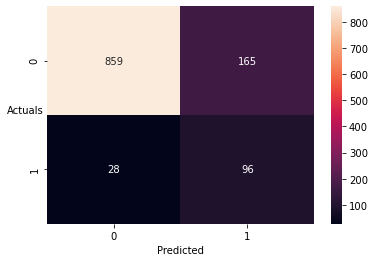

In [72]:
#confusion matrix for test set

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [73]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 859 
False Positives: 165 
False Negatives: 28 
True Positives: 96


In [74]:
#classification report

print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.968     0.839     0.899      1024
         1.0      0.368     0.774     0.499       124

    accuracy                          0.832      1148
   macro avg      0.668     0.807     0.699      1148
weighted avg      0.904     0.832     0.856      1148



Accuracy of the model i.e. %overall correct predictions is 82% & sensitivity of the model stands at 76%

We may choose cutoff of 0.17 as it gave slightly lower model sensitivity from that of at 0.15 but the overall accuracy of the model is slightly more in test dataset.

### THE END

# FRA Milestone 2

## Build Random Forest Model

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [76]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(random_state=42)

In [77]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [80]:
CV_rfc = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [82]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [85]:
clfRF=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=6, criterion='gini')

In [86]:
clfRF.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=500,
                       random_state=42)

Predict on training & test datasets

In [87]:
y_pred_train = clfRF.predict(X_train)
y_pred_test = clfRF.predict(X_test)

RFmodel_score_train = clfRF.score(X_train, y_train)
RFmodel_score_test = clfRF.score(X_test, y_test)

In [88]:
RFmodel_score_train

0.9909871244635193

In [89]:
RFmodel_score_test

0.9773519163763066

Classification report

In [90]:
print("Train Classification Report\n",metrics.classification_report(y_train,y_pred_train,digits=3))
print("Test Classification Report\n",metrics.classification_report(y_test,y_pred_test,digits=3))

Train Classification Report
               precision    recall  f1-score   support

         0.0      0.991     0.999     0.995      2077
         1.0      0.992     0.925     0.957       253

    accuracy                          0.991      2330
   macro avg      0.991     0.962     0.976      2330
weighted avg      0.991     0.991     0.991      2330

Test Classification Report
               precision    recall  f1-score   support

         0.0      0.984     0.991     0.987      1024
         1.0      0.922     0.863     0.892       124

    accuracy                          0.977      1148
   macro avg      0.953     0.927     0.940      1148
weighted avg      0.977     0.977     0.977      1148



In [91]:
#Confusion MAtrix
print("Train Confusion Matrix -\n", confusion_matrix(y_train,y_pred_train))
print("Test Confusion Matrix -\n", confusion_matrix(y_test,y_pred_test))


Train Confusion Matrix -
 [[2075    2]
 [  19  234]]
Test Confusion Matrix -
 [[1015    9]
 [  17  107]]


For Train Data - Area under Curve is 0.9997773468498384


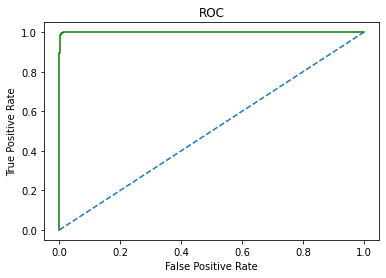

In [92]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,clfRF.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,clfRF.predict_proba(X_train)[:,1])
print('For Train Data - Area under Curve is', rf_train_auc)

For Test Data - Area under Curve is 0.9877220892137097


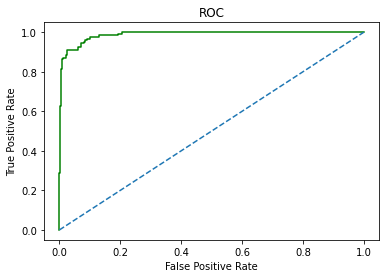

In [93]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,clfRF.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,clfRF.predict_proba(X_test)[:,1])
print('For Test Data - Area under Curve is', rf_test_auc)

## Build LDA Model


In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [95]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
model

LinearDiscriminantAnalysis()

In [96]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

CLmodel_score_train = clf.score(X_train, y_train)
CLmodel_score_test = clf.score(X_test, y_test)

In [97]:
print("Train Classification Report\n",metrics.classification_report(y_train,y_pred_train,digits=3))
print("Test Classification Report\n",metrics.classification_report(y_test,y_pred_test,digits=3))

Train Classification Report
               precision    recall  f1-score   support

         0.0      0.929     0.980     0.954      2077
         1.0      0.703     0.383     0.496       253

    accuracy                          0.915      2330
   macro avg      0.816     0.682     0.725      2330
weighted avg      0.904     0.915     0.904      2330

Test Classification Report
               precision    recall  f1-score   support

         0.0      0.928     0.973     0.950      1024
         1.0      0.627     0.379     0.472       124

    accuracy                          0.909      1148
   macro avg      0.777     0.676     0.711      1148
weighted avg      0.896     0.909     0.898      1148



In [98]:
print("Train Confusion Matrix -\n", confusion_matrix(y_train,y_pred_train))
print("Test Confusion Matrix -\n", confusion_matrix(y_test,y_pred_test))

Train Confusion Matrix -
 [[2036   41]
 [ 156   97]]
Test Confusion Matrix -
 [[996  28]
 [ 77  47]]


For Train Data - Area under Curve is 0.9154241542510576


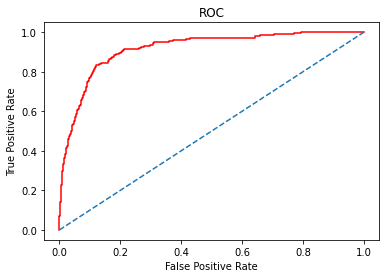

In [99]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,clf.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,clf.predict_proba(X_train)[:,1])
print('For Train Data - Area under Curve is', rf_train_auc)

For Test Data - Area under Curve is 0.876645980342742


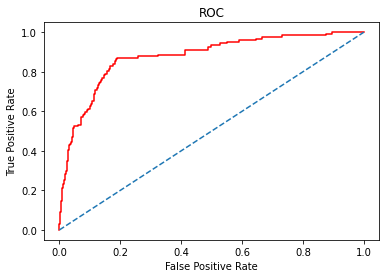

In [100]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
print('For Test Data - Area under Curve is', rf_test_auc)

### END